### 결과값 내보내기

In [71]:
result = combined_data[['Label','classification_title','classification_contents']]

In [26]:
result.head()
# '이름' 열에서 '홍길동' 값을 '홍길씨'로 변경
result.loc[result['Label'] == '4강~언플', 'Label'] = '4강~여론이슈'
result.loc[result['Label'] == '언플~경질', 'Label'] = '여론이슈~경질'
result.to_csv("/content/drive/MyDrive/비타민NLP/data/result.csv", index=False)

In [71]:
result = pd.read_csv('/content/drive/MyDrive/비타민NLP/data/result.csv', encoding = 'utf-8')
label_order = ['조별리그', '16~8강', '8강~4강', '4강~여론이슈', '여론이슈~경질', '경질이후']
result = result.set_index('Label').loc[label_order].reset_index()

In [72]:
data = result


data_ordered = data.set_index('Label').loc[label_order].reset_index()
data = result.set_index('Label').loc[label_order].reset_index()

### 결과값 시각화

#### 한글폰트다운

In [73]:
# 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [74]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

 # 그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'NanumGothic') # 한글 설정

<ipython-input-74-e276c0e729a9>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### 바차트, 박스플롯
1. 기사 제목의 감성 분포 바 차트: 각 라벨별로 기사 제목의 감성(긍정적, 부정적, 중립적) 분포를 보여줍니다.
2. 기사 본문의 감성 분포 바 차트: 각 라벨별로 기사 본문의 감성 분포를 보여줍니다.
3. 기사 제목의 감성 점수 분포 박스 플롯: 각 라벨별로 기사 제목의 감성 점수 분포를 나타냅니다.
4. 기사 본문의 감성 점수 분포 박스 플롯: 각 라벨별로 기사 본문의 감성 점수 분포를 나타냅니다.

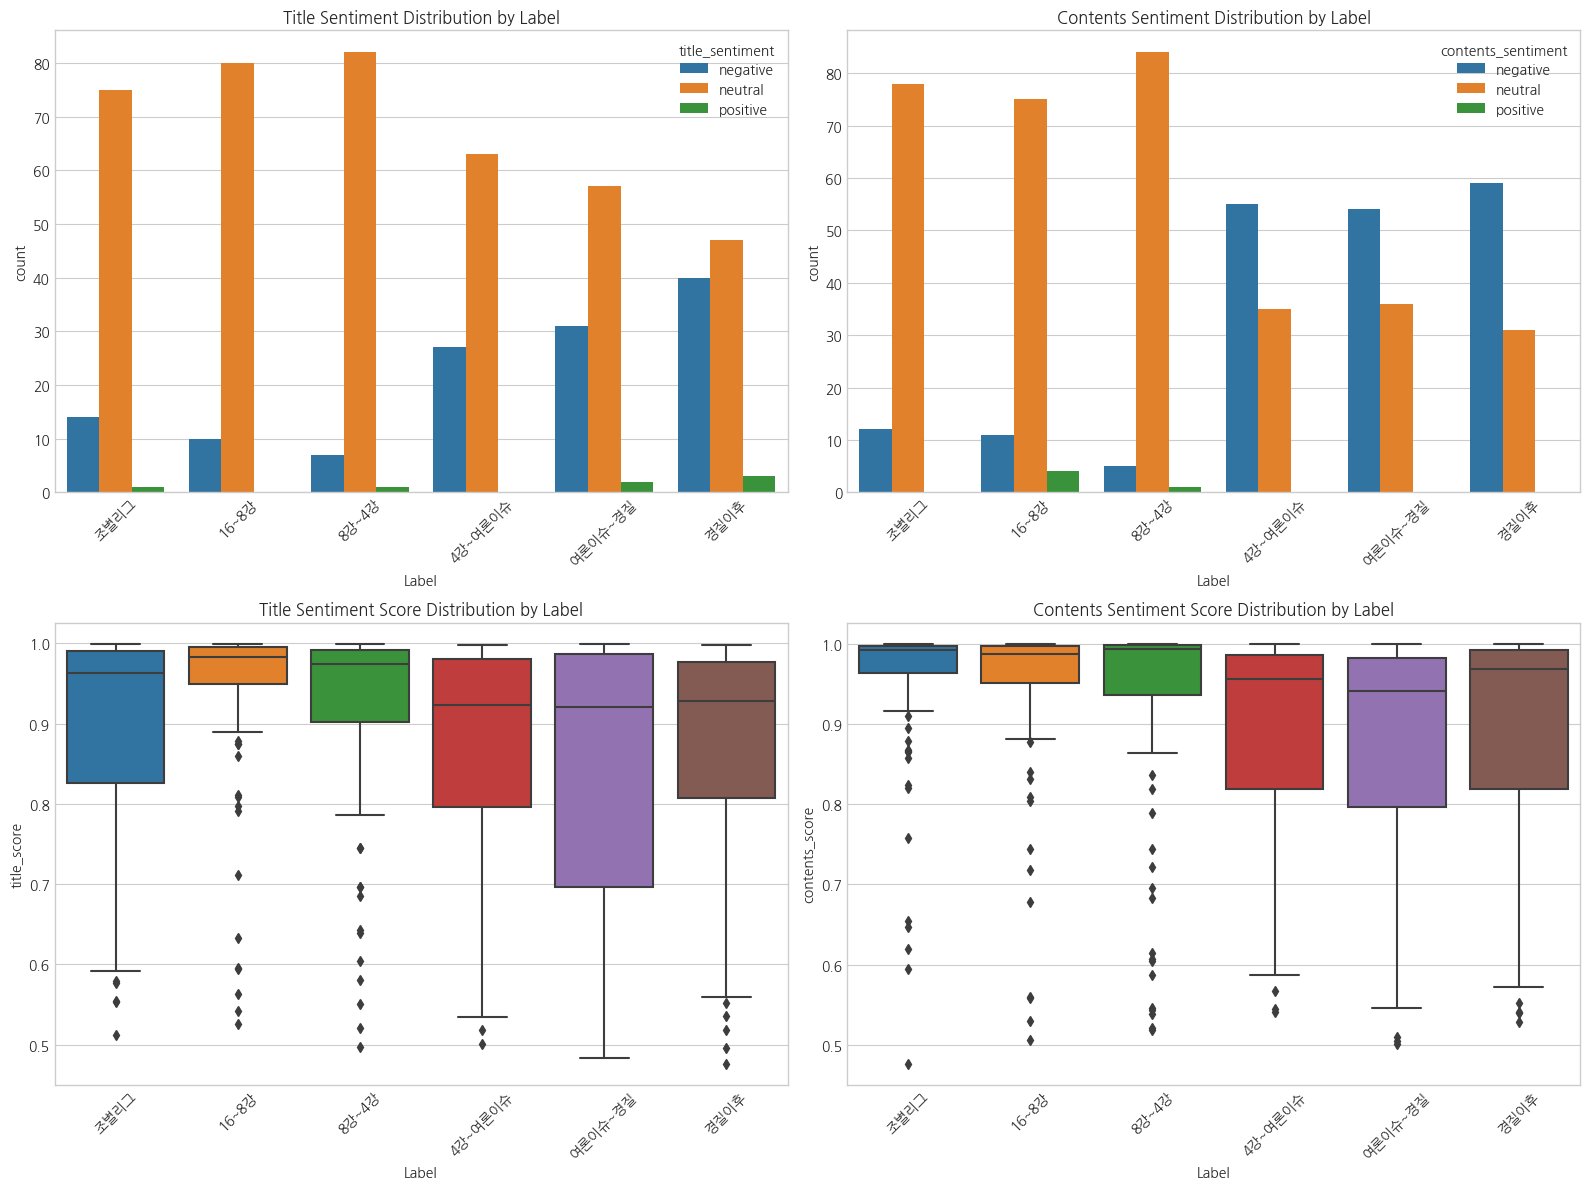

In [75]:

# Load the data

data = pd.read_csv('/content/drive/MyDrive/비타민NLP/data/result.csv')

# Function to parse the sentiment classification results
def parse_sentiment(data):
    try:
        # Convert string representation of list to actual list
        data = ast.literal_eval(data)
        # Extract the first item (as there's only one item in each list)
        if data:
            return data[0]['label'], data[0]['score']
        else:
            return None, None
    except Exception as e:
        # Handle any exception (e.g., malformed string) and return None values
        return None, None

# Applying the parsing function
data['title_sentiment'], data['title_score'] = zip(*data['classification_title'].apply(parse_sentiment))
data['contents_sentiment'], data['contents_score'] = zip(*data['classification_contents'].apply(parse_sentiment))

# Aggregating sentiment counts for each label for both title and contents
title_sentiment_counts = data.groupby('Label')['title_sentiment'].value_counts().unstack().fillna(0)
contents_sentiment_counts = data.groupby('Label')['contents_sentiment'].value_counts().unstack().fillna(0)

# Creating visualizations
plt.figure(figsize=(16, 12))

# Visualization 1: Bar chart for title sentiment distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Label', hue='title_sentiment', data=data)
plt.title('Title Sentiment Distribution by Label')
plt.xticks(rotation=45)

# Visualization 2: Bar chart for contents sentiment distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Label', hue='contents_sentiment', data=data)
plt.title('Contents Sentiment Distribution by Label')
plt.xticks(rotation=45)

# Visualization 3: Box plot for sentiment scores (title)
plt.subplot(2, 2, 3)
sns.boxplot(x='Label', y='title_score', data=data)
plt.title('Title Sentiment Score Distribution by Label')
plt.xticks(rotation=45)

# Visualization 4: Box plot for sentiment scores (contents)
plt.subplot(2, 2, 4)
sns.boxplot(x='Label', y='contents_score', data=data)
plt.title('Contents Sentiment Score Distribution by Label')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### [기간별 제목과 본문의 평균분산비교],
1. 각 라벨 별 감성 점수의 평균과 분산을 나타내는 시각화: 각 라벨 별로 기사 제목과 본문의 감성 점수의 평균과 분산을 비교합니다.
2. 감성 점수에 따른 히스토그램: 기사 제목과 본문의 감성 점수 분포를 히스토그램으로 표시합니다.
3. 각 라벨 별 감성 분포의 스택드 바 차트: 각 라벨 별 기사 제목과 본문의 감성 분포를 스택드 바 차트로 나타냅니다.

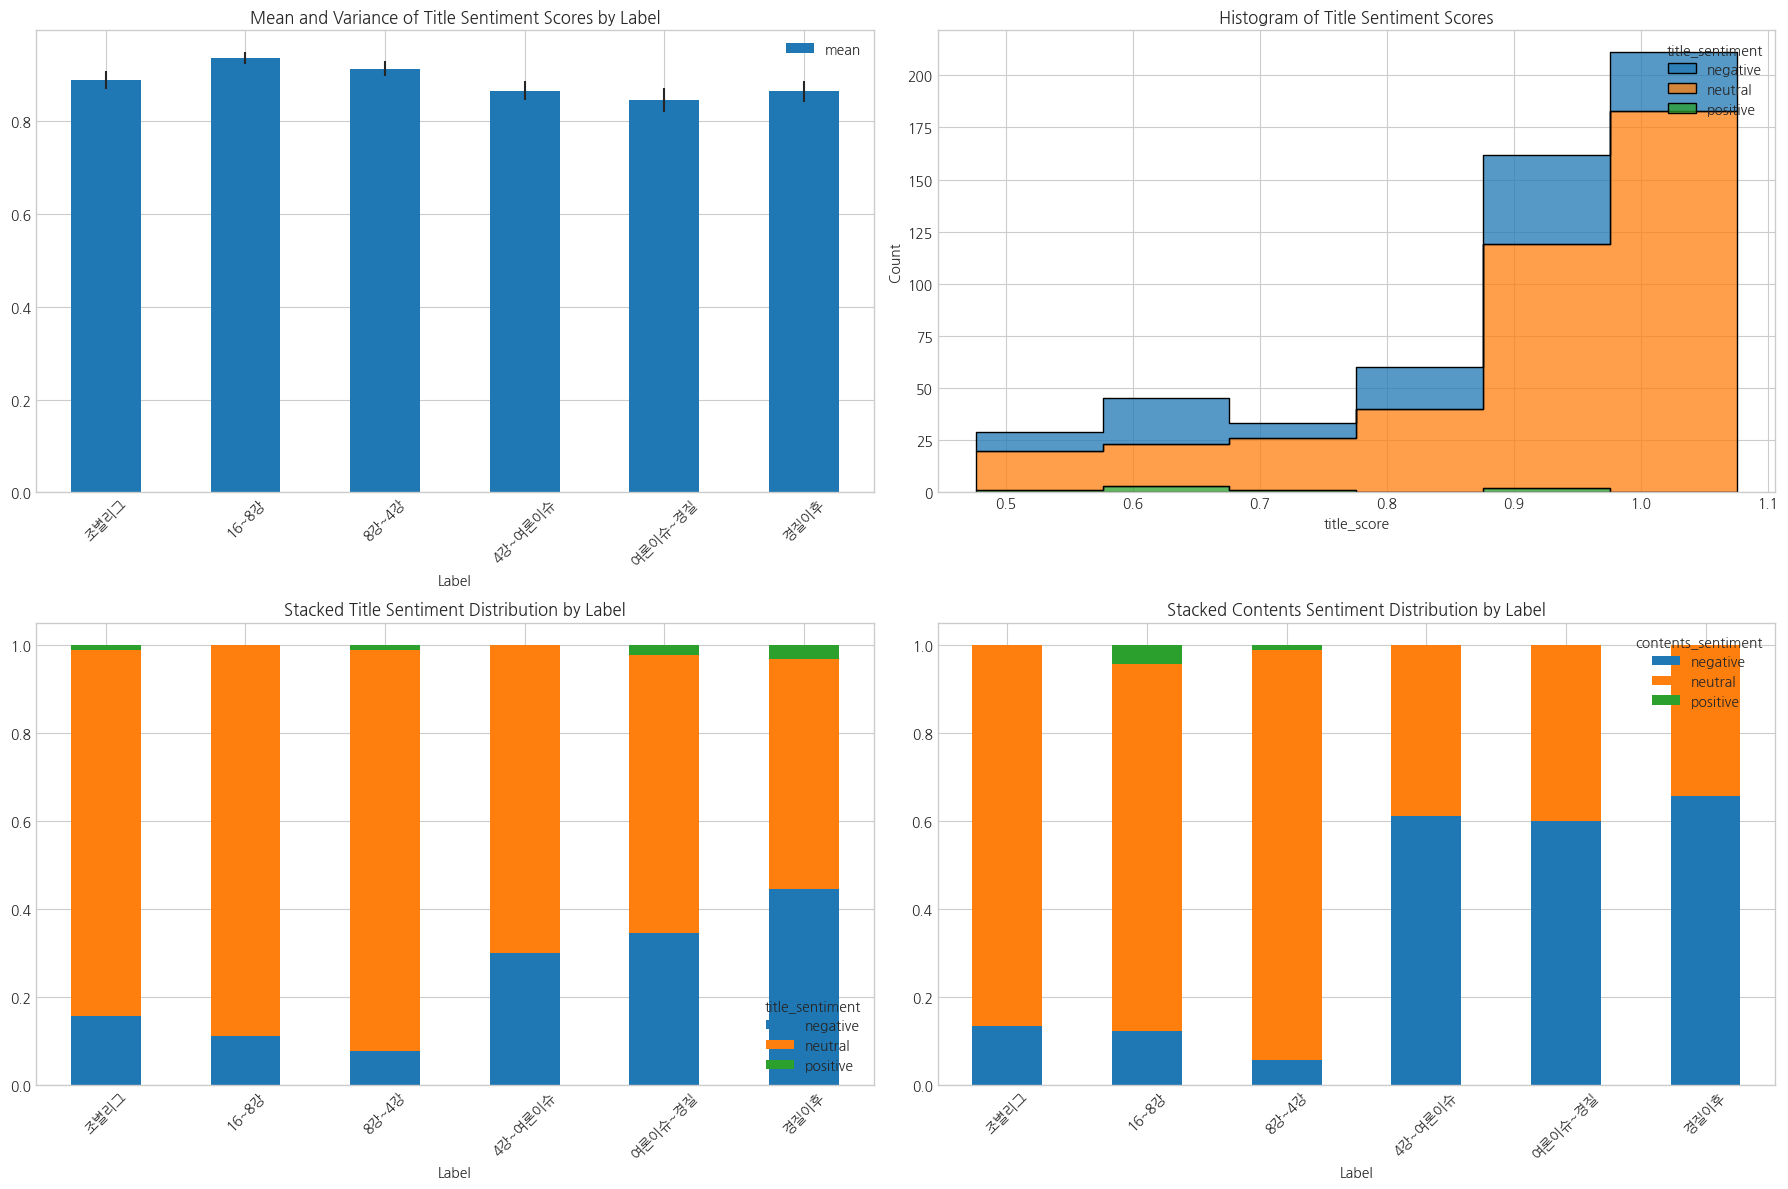

In [99]:
# Additional visualizations

plt.figure(figsize=(18, 12))

# Visualization 5: Mean and variance of sentiment scores by label
plt.subplot(2, 2, 1)
title_mean_var = data.groupby('Label')['title_score'].agg(['mean', 'var']).reindex(label_order)
contents_mean_var = data.groupby('Label')['contents_score'].agg(['mean', 'var']).reindex(label_order)


title_mean_var.plot(kind='bar', y='mean', yerr='var', ax=plt.gca(), title='Mean and Variance of Title Sentiment Scores by Label')
plt.xticks(rotation=45)

# Visualization 6: Histogram of sentiment scores
plt.subplot(2, 2, 2)
sns.histplot(data, x='title_score', hue='title_sentiment', multiple="stack", element="step", binwidth=0.1)
plt.title('Histogram of Title Sentiment Scores')

# Visualization 7: Stacked bar chart of sentiment distribution by label
plt.subplot(2, 2, 3)
stacked_title = title_sentiment_counts.div(title_sentiment_counts.sum(axis=1), axis=0).reindex(label_order)
stacked_title.plot(kind='bar', stacked=True, ax=plt.gca(), title='Stacked Title Sentiment Distribution by Label')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
stacked_contents = contents_sentiment_counts.div(contents_sentiment_counts.sum(axis=1), axis=0).reindex(label_order)
stacked_contents.plot(kind='bar', stacked=True, ax=plt.gca(), title='Stacked Contents Sentiment Distribution by Label')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


감성 분포의 일관성 여부: 각 라벨별로 기사 제목과 본문의 감성 분포를 비교함으로써, 특정 라벨이 긍정적, 부정적, 또는 중립적 감성을 가진 기사들로 일관되게 구성되었는지 여부를 판단할 수 있습니다. 이를 통해 특정 주제나 사건이 어떻게 보도되었는지에 대한 통찰을 얻을 수 있습니다.

감성 점수의 분포: 기사 제목과 본문의 감성 점수 분포를 통해, 전반적인 감성의 강도와 분산을 파악할 수 있습니다. 이는 각 라벨별로 얼마나 강렬하거나 미묘한 감성이 표현되었는지를 나타냅니다.

감성 점수의 평균과 분산: 각 라벨별 감성 점수의 평균과 분산을 통해, 기사들이 얼마나 일관된 감성을 보이는지, 또는 그 감성이 얼마나 다양한지를 파악할 수 있습니다. 높은 분산은 다양한 감성의 표현을, 낮은 분산은 보다 일관된 감성의 표현을 나타냅니다.

라벨별 감성 경향성: 스택드 바 차트를 통해, 각 라벨이 긍정적, 부정적, 또는 중립적 감성을 어떻게 반영하는지를 볼 수 있습니다. 이는 특정 주제나 사건에 대한 대중의 인식이나 미디어의 보도 경향을 이해하는 데 도움이 될 수 있습니다.

### 순서대로


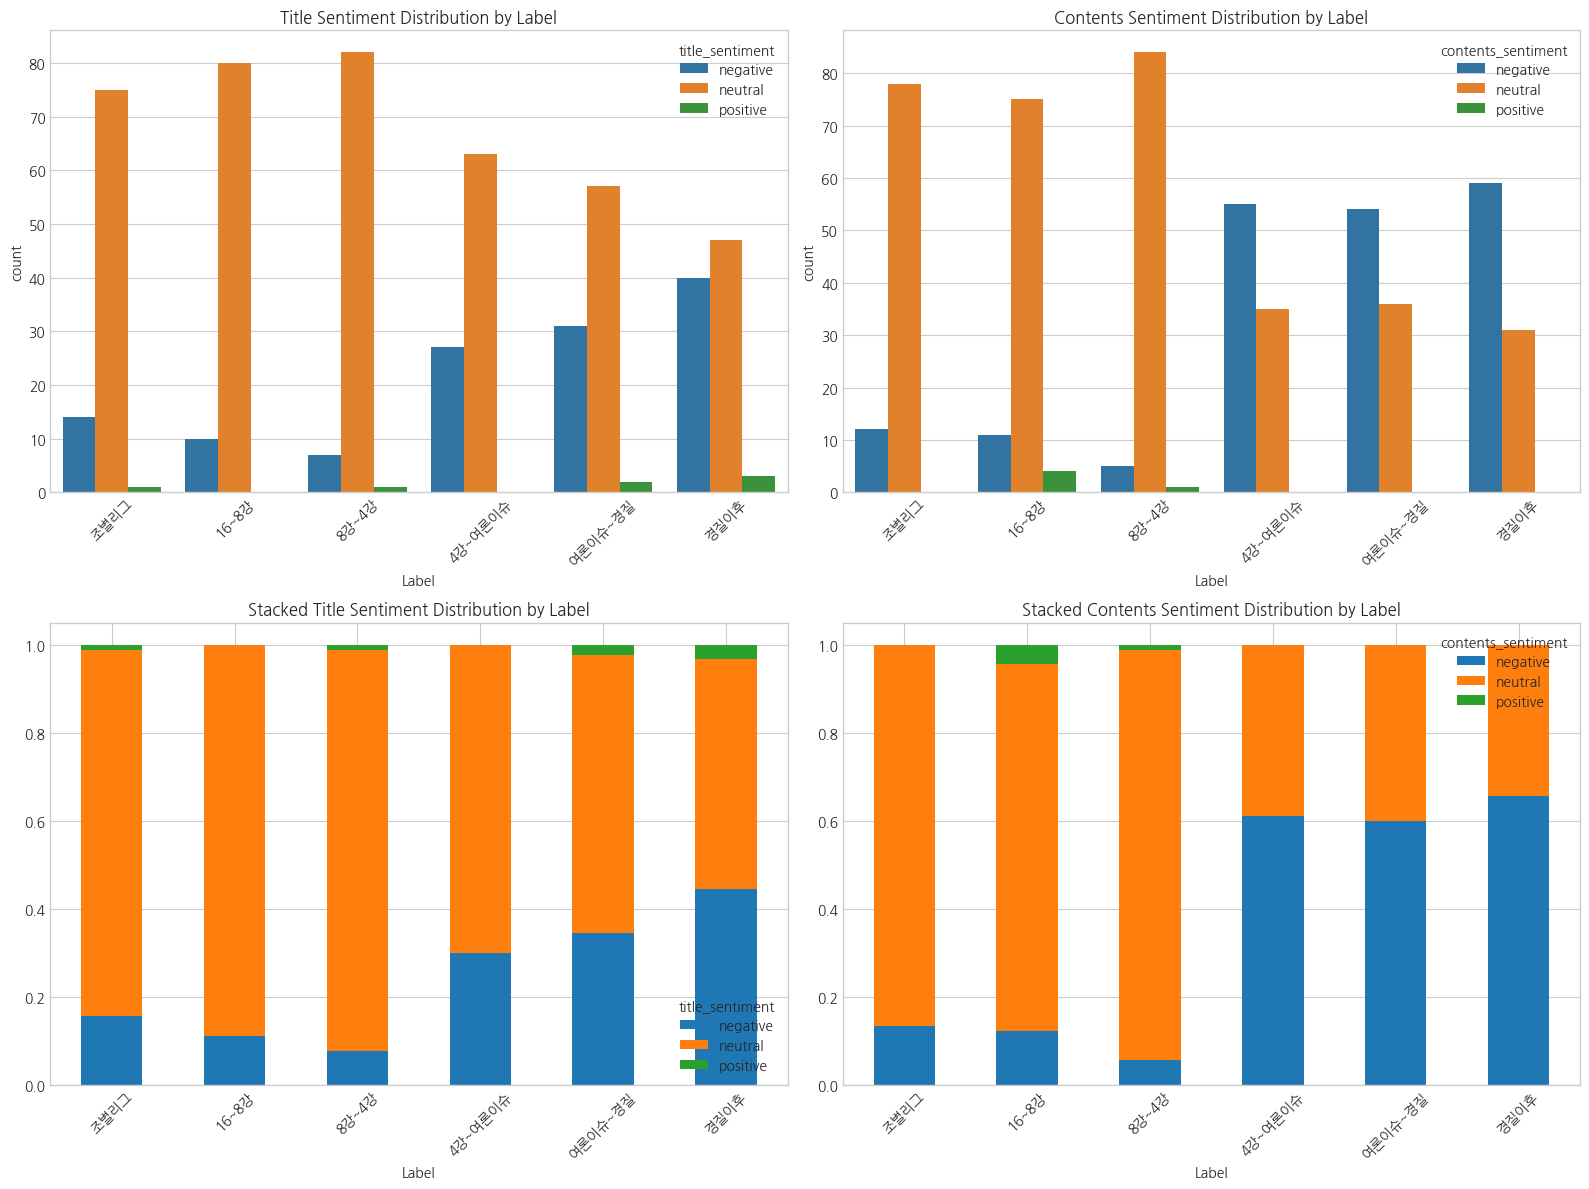

In [103]:
# Reordering the data according to the specified label order
label_order = ['조별리그', '16~8강', '8강~4강', '4강~여론이슈', '여론이슈~경질', '경질이후']
data_ordered = data.set_index('Label').loc[label_order].reset_index()

# Reaggregating sentiment counts for each label for both title and contents in the specified order
title_sentiment_counts_ordered = data_ordered.groupby('Label')['title_sentiment'].value_counts().unstack().fillna(0).reindex(label_order)
contents_sentiment_counts_ordered = data_ordered.groupby('Label')['contents_sentiment'].value_counts().unstack().fillna(0).reindex(label_order)

# Creating visualizations with the specified label order
plt.figure(figsize=(16, 12))

# Visualization 1: Bar chart for title sentiment distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Label', hue='title_sentiment', data=data_ordered, order=label_order)
plt.title('Title Sentiment Distribution by Label')
plt.xticks(rotation=45)

# Visualization 2: Bar chart for contents sentiment distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Label', hue='contents_sentiment', data=data_ordered, order=label_order)
plt.title('Contents Sentiment Distribution by Label')
plt.xticks(rotation=45)

# Visualization 3: Stacked bar chart for title sentiment distribution
plt.subplot(2, 2, 3)
title_sentiment_counts_ordered.div(title_sentiment_counts_ordered.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Title Sentiment Distribution by Label')
plt.xticks(rotation=45)

# Visualization 4: Stacked bar chart for contents sentiment distribution
plt.subplot(2, 2, 4)
contents_sentiment_counts_ordered.div(contents_sentiment_counts_ordered.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Contents Sentiment Distribution by Label')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


기사 수의 분포: 모든 라벨에서 기사 수가 균등하게 분포되어 있습니다. 이는 각 단계에서 일관된 관심도를 반영할 수 있습니다.

감성 점수의 평균: '조별리그'와 '168강'에서 평균 감성 점수가 높은 편이며, '언플경질'에서는 상대적으로 낮습니다. 이는 '조별리그'와 '168강' 단계에서 긍정적인 보도가 많았음을 나타낼 수 있으며, '언플경질' 단계에서는 부정적인 감성이 더 많았을 수 있음을 시사합니다.

감성 점수의 변화: 기사 제목과 본문의 감성 점수 평균은 일관된 패턴을 보이지 않으며, 다양한 감성이 반영되어 있습니다. 이는 해당 기간 동안 다양한 사건 및 주제가 보도되었음을 의미할 수 있습니다.

#### 시간에 따른 부정적인 감성 평균 시각화

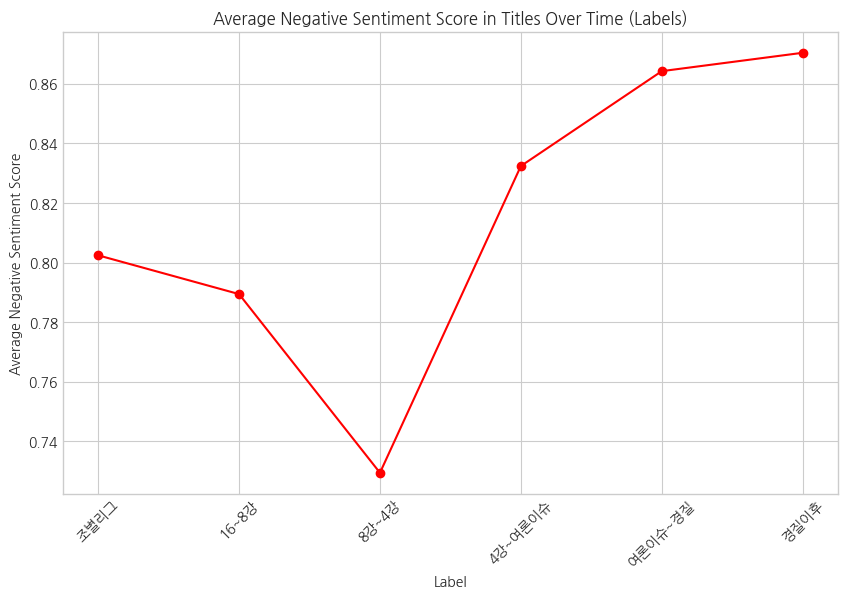

In [111]:
# Correcting the label order in the plot as per the user's request
correct_label_order = ['조별리그', '16~8강', '8강~4강', '4강~여론이슈', '여론이슈~경질', '경질이후']

# Reordering the average negative sentiment scores according to the correct label order
negative_sentiment_avg_correct_order =negative_sentiment_avg

# Plotting the average negative sentiment score over time (labels) with the correct order
plt.figure(figsize=(10, 6))
negative_sentiment_avg_correct_order.plot(kind='line', marker='o', color='red')
plt.title('Average Negative Sentiment Score in Titles Over Time (Labels)')
plt.ylabel('Average Negative Sentiment Score')
plt.xlabel('Label')
plt.xticks(range(len(correct_label_order)), correct_label_order, rotation=45)

plt.show()


부정적인 감성 점수는 각 단계별로 변화하는 경향을 보입니다. '4강여론이슈'와 '여론이슈경질' 단계에서 부정적인 감성 점수가 증가하는 경향을 보이며, 이는 해당 시기에 대중의 부정적인 반응이나 비판적인 보도가 증가했음을 나타낼 수 있습니다.
'경질이후' 단계에서도 부정적인 감성 점수가 높게 나타나며, 이는 경질 이후의 사건이나 상황에 대한 부정적인 보도가 많았음을 의미할 수 있습니다.
이 그래프는 각 단계에서의 미디어 보도 경향과 대중의 감성 변화를 이해하는 데 도움이 될 수 있습니다.